### 简单线性回归(最小二乘法)

#### 0.引入依赖

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### 1.导入数据（data.csv)

In [9]:
points = np.genfromtxt('data.csv',delimiter=',')

points

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

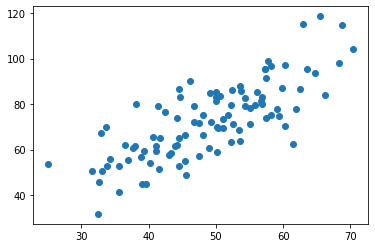

In [10]:
#提取points中的两列数据，分别作为x，y
x = points[:,0]
y = points[:,1]

#用plt画出散点图
plt.scatter(x,y)
plt.show()

#### 2.定义损失函数

In [11]:
#损失函数是系数的函数，另外还要传入数据的x,y
def compute_cost(w,b,points):
    total_cost = 0
    M = len(points)
    
    #逐点计算平方损失误差，然后求平均数
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        total_cost += ( y- w * x - b) ** 2
    
    return total_cost/M

#### 3.定义算法拟合函数
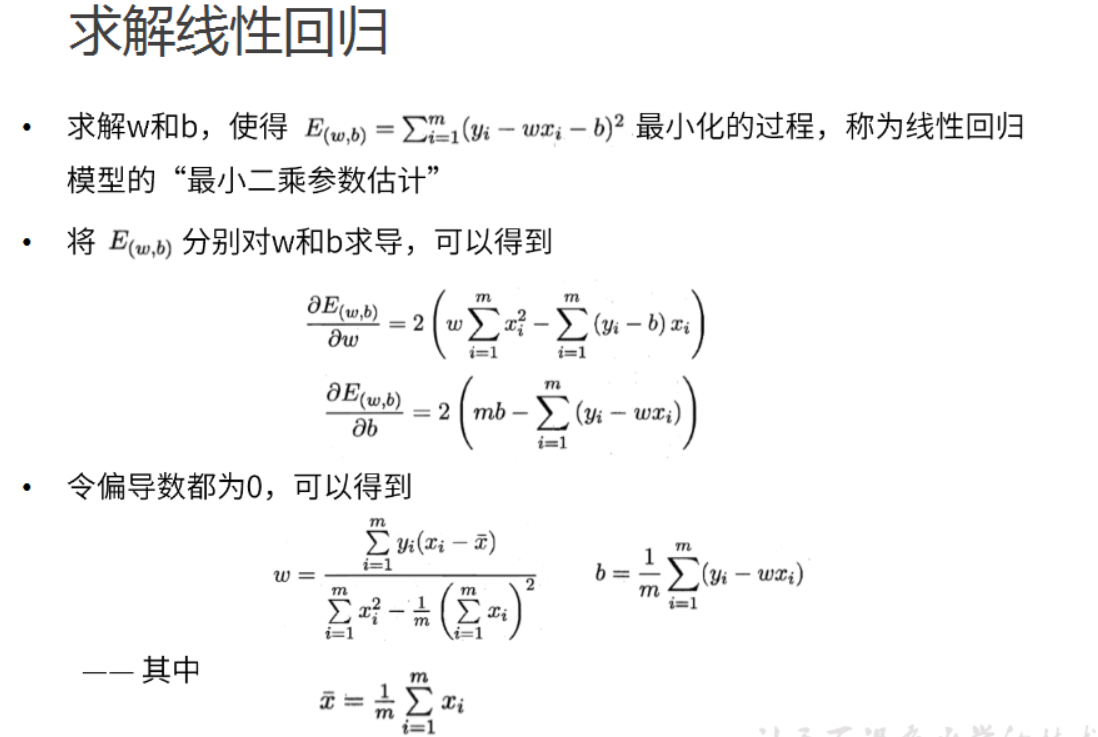

In [12]:
#先定义一个求均值的函数
def average(data):
    sum=0
    num=len(data)
    for i in range(num):
        sum += data[i]
    return sum/num

#定义核心拟合函数
def fit(points):
    M = len(points)
    x_bar = average(points[:,0])
    
    sum_yx = 0
    sum_x2 = 0
    sum_delta = 0
    
    for i in range(M):
        x= points[i,0]
        y= points[i,1]
        sum_yx +=y * (x-x_bar)
        sum_x2 += x**2
    #根据公式计算w,b
    w = sum_yx / (sum_x2 -M *(x_bar**2))
    
    for i in range(M):
        x= points[i,0]
        y= points[i,1]
        sum_delta += (y - w*x)
    b = sum_delta/M
    
    return w,b

#### 4.测试

In [14]:
w,b =fit(points)

print("W is:",w)
print("b is:",b)

cost = compute_cost(w,b,points)

print("cost is:",cost)

W is: 1.3224310227553846
b is: 7.991020982269173
cost is: 110.25738346621313


#### 5.画出拟合曲线

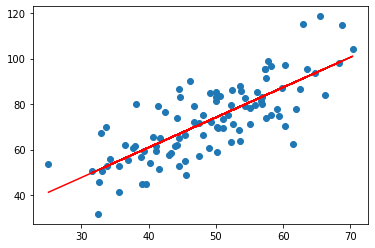

In [15]:
plt.scatter(x,y)
#针对每一个x,计算出预测的y值
pred_y = w * x +b

plt.plot(x,pred_y,c='r')
plt.show()